<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Average-Star-Ratings" data-toc-modified-id="Average-Star-Ratings-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Average Star Ratings</a></span></li><li><span><a href="#Review-Length-and-Star-Ratings" data-toc-modified-id="Review-Length-and-Star-Ratings-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Review Length and Star Ratings</a></span></li><li><span><a href="#Cities-in-the-Dataset" data-toc-modified-id="Cities-in-the-Dataset-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Cities in the Dataset</a></span><ul class="toc-item"><li><span><a href="#Calculating-the-Sparsity-Matrix-for-each-city" data-toc-modified-id="Calculating-the-Sparsity-Matrix-for-each-city-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Calculating the Sparsity Matrix for each city</a></span></li></ul></li><li><span><a href="#Looking-at-Restaurant-Categories" data-toc-modified-id="Looking-at-Restaurant-Categories-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Looking at Restaurant Categories</a></span></li><li><span><a href="#Individual-Restaurant-Analysis" data-toc-modified-id="Individual-Restaurant-Analysis-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Individual Restaurant Analysis</a></span><ul class="toc-item"><li><span><a href="#Looking-at-Checkins" data-toc-modified-id="Looking-at-Checkins-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Looking at Checkins</a></span></li><li><span><a href="#Timeseries" data-toc-modified-id="Timeseries-1.5.2"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Timeseries</a></span></li></ul></li><li><span><a href="#Users-and-their-friends" data-toc-modified-id="Users-and-their-friends-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Users and their friends</a></span></li><li><span><a href="#Tips-Dataset" data-toc-modified-id="Tips-Dataset-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Tips Dataset</a></span></li><li><span><a href="#Business-Attributes-Dataset" data-toc-modified-id="Business-Attributes-Dataset-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Business Attributes Dataset</a></span></li></ul></li></ul></div>

# EDA

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style(style='whitegrid')
import matplotlib.pyplot as plt
import statsmodels

In [12]:
#sets the default options for viewing pandas dataframes
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
#pd.set_option('display.width', 100)
pd.set_option('display.max_info_columns', 50)

In [13]:
path = '/Users/dmitriykats/Documents/SpringBoard/Springboard/Capstone2/true_review/data/'

In [14]:
df = pd.read_csv(f'{path}/raw/restaurant_reviews.csv', parse_dates=['date'])

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
print(f'Number of Users: {df.user_id.unique().shape[0]}')
print(f'Number of Restaurants: {df.business_id.unique().shape[0]}')
print(f'Number of Reviews: {df.text.unique().shape[0]}')

Number of Users: 888427
Number of Restaurants: 48588
Number of Reviews: 3065839


In [16]:
df.columns

Index(['user_id', 'business_id', 'rev_stars', 'date', 'text', 'useful',
       'funny', 'cool', 'bus_id', 'name', 'neighborhood', 'address', 'city',
       'state', 'postal_code', 'latitude', 'longitude', 'bus_stars',
       'review_count', 'is_open', 'categories'],
      dtype='object')

In [17]:
df = df.drop(columns='bus_id')

In [18]:
#create a weekday column 
df['weekday'] = df.date.apply(lambda x: x.weekday())
#add a new colomn which calculates the number of characters in a given review
df['text length'] = df['text'].apply(len)
#add a year column
df['year'] = df.date.apply(lambda x: x.year)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3066833 entries, 0 to 3066832
Data columns (total 23 columns):
user_id         object
business_id     object
rev_stars       int64
date            datetime64[ns]
text            object
useful          int64
funny           int64
cool            int64
name            object
neighborhood    object
address         object
city            object
state           object
postal_code     object
latitude        float64
longitude       float64
bus_stars       float64
review_count    int64
is_open         int64
categories      object
weekday         int64
text length     int64
year            int64
dtypes: datetime64[ns](1), float64(3), int64(9), object(10)
memory usage: 538.2+ MB


In [20]:
df.isnull().sum()

user_id               0
business_id           0
rev_stars             0
date                  0
text                  0
useful                0
funny                 0
cool                  0
name                  0
neighborhood    1461574
address               0
city                  0
state                 0
postal_code        1054
latitude              0
longitude             0
bus_stars             0
review_count          0
is_open               0
categories            0
weekday               0
text length           0
year                  0
dtype: int64

In [21]:
df.head()

,user_id,business_id,rev_stars,date,text,useful,funny,cool,name,neighborhood,address,city,state,postal_code,latitude,longitude,bus_stars,review_count,is_open,categories,weekday,text length,year
0,DUfWxxewcJgGcc1Y189XSQ,ZcAoKSDT6BNcWsn3o4-WVA,2,2017-01-07,Cool place packed to the rafters. Menu is pret...,1,0,0,"""Me & Julio""",NaN,"""2784 S Fish Hatchery Rd""",Fitchburg,WI,53711,43.005728,-89.427154,3.0,102,1,Restaurants;Mexican;Tex-Mex;American (Traditio...,5,369,2017
1,oAJf-_URH4QBMs2ZMpjUyA,9VhZRkmyoEho58vmnMh_Hg,3,2016-04-11,"I've had mixed experiences at this Montana's, ...",0,0,0,"""Montana's BBQ & Bar""",NaN,"""8735 Yonge St""",Richmond Hill,ON,L4C 6Z1,43.840823,-79.428224,3.0,49,1,Comfort Food;Restaurants;American (Traditional...,0,524,2016
2,SOb8RgcqBGbwlq9LZXy3fQ,IgOaTag1zhIXndxngP0M3w,1,2016-09-21,Die Angaben hier sind leider nicht mehr ganz k...,0,0,0,"""Restaurant Ganesha""",NaN,"""Auberlenstr. 40""",Fellbach,BW,70736,48.818648,9.270925,3.0,8,1,Restaurants;Indian,2,125,2016
3,Iwe-xN6dnugdZ0KiQjO6Hg,Fvd8qeJCXFbMYQk45S7iBQ,5,2014-06-30,My family came in while waiting for our time a...,0,0,0,"""Las Fuentes Mexican Grill""",NaN,"""13621 N Litchfield Rd""",Surprise,AZ,85374,33.607472,-112.355941,3.5,151,1,Mexican;Restaurants,0,256,2014
4,VSCpdfEtjdWjTbBVKMb5eA,mF2EW3twSrFPmT_RVV1-Qg,2,2011-11-18,I would not recommend this place for Chinese f...,3,5,0,"""House of Hunan""",NaN,"""18 Public Sq""",Medina,OH,44256,41.138544,-81.864299,3.0,83,1,Restaurants;Chinese,4,992,2011


In [122]:
df.groupby(['user_id', 'business_id']).size().sort_values(ascending=False)

user_id                 business_id           
zzzmshdEWLFCApxETl1TGQ  74pWjFssgqyhaVg-YCUo3A    1
KF_EL3Jk3TXrOVXLmXVG3w  iCQpiavjjPzJ5_3gPD5Ebg    1
KFaSfQDBPTy0F0BzOMXqoQ  Fy4t2XHIRKwMk_ocCZze0Q    1
KFaF9feuO6iY3ptmpIKQDg  eNcYNWN1e5zgIwxebVV6PA    1
                        F8K9XTK3WN0i4G_EIXzY9g    1
KF_piIkY0permkVJv2ppug  E_sO3D6lGkd_AURPBz8yrw    1
KF_oxnaYAn1XkRiJYwTt7w  ky5L-EfUwU9chSPcIeXM5w    1
                        DzKl51tivGJMLiNsQqf38w    1
                        3ViGD_AF1AUmxF4zeHB_kQ    1
KF_j3dNh-EYpPYvLYc4xew  GpzQY2XLo5A35Cf8-Mjazg    1
KF_EL3Jk3TXrOVXLmXVG3w  thLX_k20SPJ0KyusGTBIHw    1
                        f4x1YBxkLrZg652xt2KR5g    1
KFZISl5mOUJ6bu3qCUrO-g  w8RWhhuKxMiFCpvFvIQ3zg    1
KF_EL3Jk3TXrOVXLmXVG3w  K-uQkfSUTwu5LIwPB4b_vg    1
KF_53E_Bbs6mil_EMMo84Q  ie8F4cL15JQi8cZVY78xRA    1
                        5REYrZfsX3m4E3FTwovp5Q    1
KFZlpzOU1Jt8ALnV-eDdNQ  UOtoOybZ5vAB4aXBLc57vA    1
KFZISl5mOUJ6bu3qCUrO-g  zdE82PiD6wquvjYLyhOJNA    1
                 

## Average Star Ratings

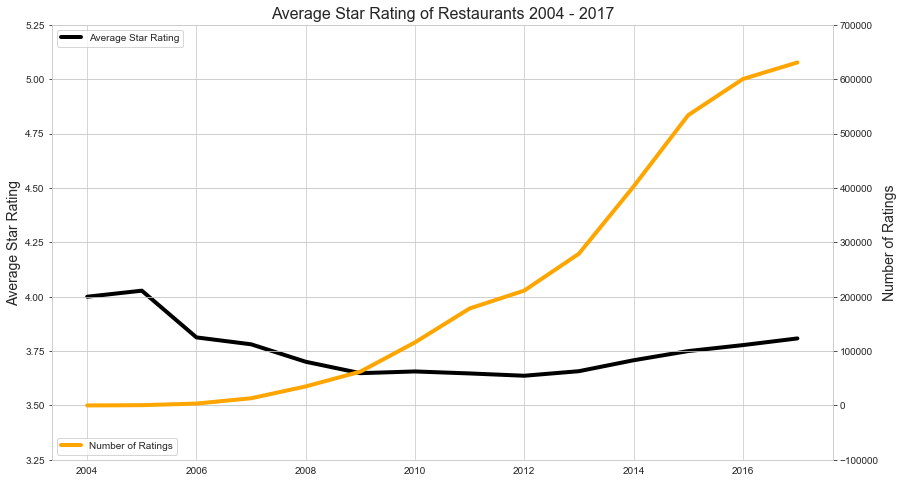

In [22]:
fig, ax = plt.subplots(figsize = (14,8))
#plt.tight_layout()

# puts the data in the figure
x1 = df.groupby(['year'])['rev_stars'].mean().keys()
x2 =  df.groupby(['year'])['rev_stars'].count().keys()

y1 = df.groupby(['year'])['rev_stars'].mean().values
y2 = df.groupby(['year'])['rev_stars'].count().values

ax = plt.subplot(111)
ax.plot(x1, y1, color='black', linewidth=4)
plt.legend(['Average Star Rating'], loc='upper left')
plt.ylim(3.25, 5.25)
plt.ylabel('Average Star Rating', fontsize=14)

ax2 = ax.twinx()
ax2.plot(x2, y2, color='orange', linewidth=4)
plt.legend(['Number of Ratings'], loc='lower left')
plt.ylim(plt.ylim(-100_000, 700_000))

plt.ylabel('Number of Ratings', fontsize=14)

plt.title('Average Star Rating of Restaurants 2004 - 2017', fontsize=16)
plt.show()
#fig.savefig('Average_Star_Ratings.png')

In [23]:
ave_reviews = pd.DataFrame(df.groupby(['year','business_id'])['rev_stars'].mean()).reset_index()

In [24]:
ave_reviews.head()

,year,business_id,rev_stars
0,2004,9X-43jnj6-6ZBuBdFm7BLA,2.0
1,2004,AtLv64FV-Pw6JuT3XUKU1g,4.0
2,2004,N2PlDjUJVfOJzsPzY0Au1w,3.0
3,2004,PD2MAlYYi9HCqPH7IBKwTg,5.0
4,2004,oYMsq2Xvzw6UbrIlMWjb-A,4.0


Text(0.5, 0, 'Year')

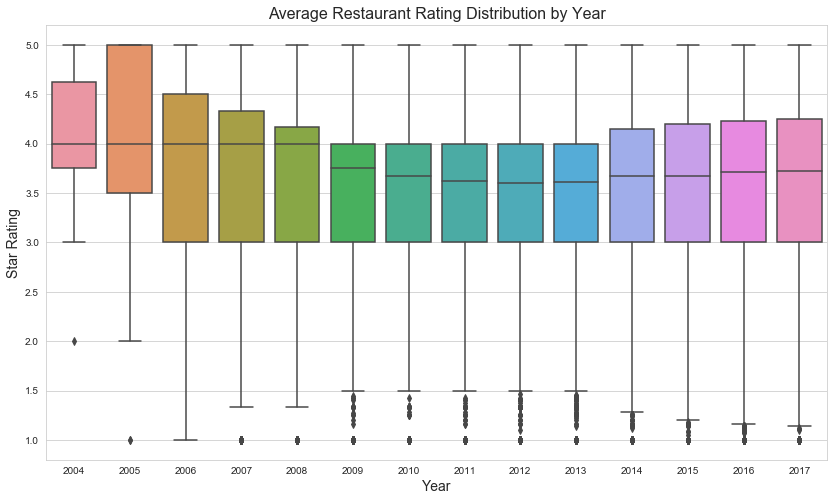

In [25]:
fig, ax = plt.subplots(figsize = (14,8))

sns.boxplot(x='year', y='rev_stars', data=ave_reviews)
plt.title('Average Restaurant Rating Distribution by Year', fontsize=16)
plt.ylabel('Star Rating', fontsize=14)
plt.xlabel('Year', fontsize=14)
#fig.savefig('Average_Star_Dist.png')

Text(0.5, 0, 'Year')

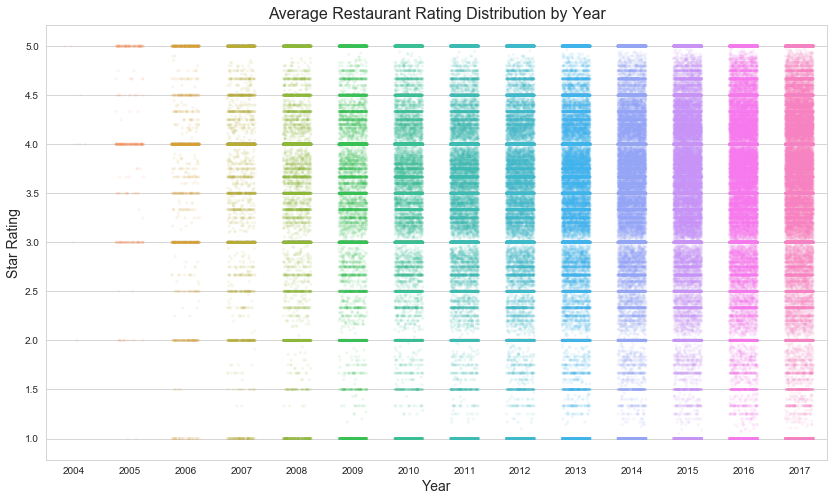

In [26]:
fig, ax = plt.subplots(figsize = (14,8))

sns.stripplot(x='year', y='rev_stars', data=ave_reviews, alpha=0.1, jitter=0.25, size=3)
plt.title('Average Restaurant Rating Distribution by Year', fontsize=16)
plt.ylabel('Star Rating', fontsize=14)
plt.xlabel('Year', fontsize=14)
#fig.savefig('Average_Star_Strip.png')

## Review Length and Star Ratings

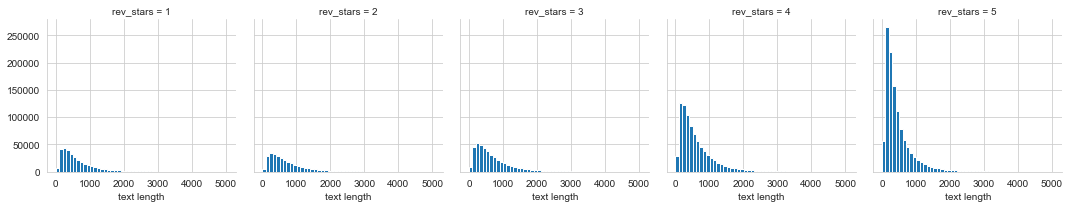

In [27]:
#distribution of reviews for each star rating
g = sns.FacetGrid(data=df, col='rev_stars')
g.map(plt.hist, 'text length', bins=50)
#fig.savefig('Text_Star_Dist.png')

Text(0.5, 0, 'Star Rating')

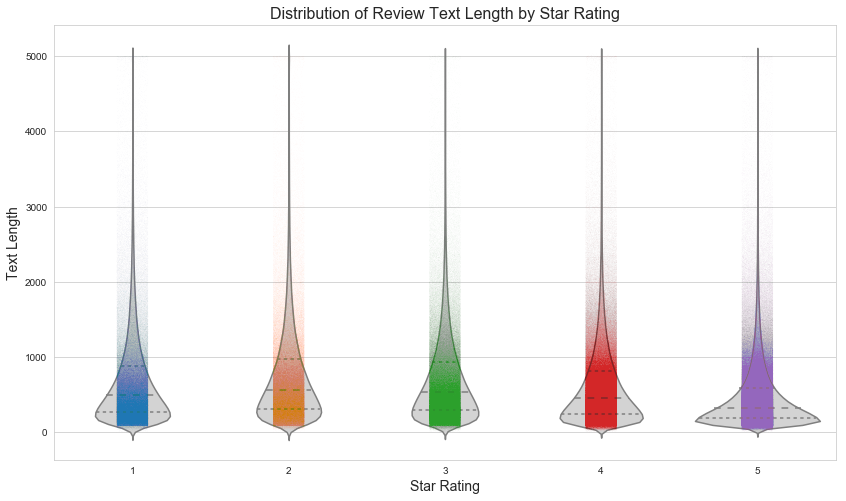

In [28]:
fig, ax = plt.subplots(figsize = (14,8))

sns.stripplot(x='rev_stars', y='text length', data=df, jitter=1, size=0.2, alpha=0.2)
sns.violinplot(x='rev_stars', y='text length', data=df, inner='quartile', color='lightgray')
plt.title('Distribution of Review Text Length by Star Rating', fontsize=16)
plt.ylabel('Text Length', fontsize=14)
plt.xlabel('Star Rating', fontsize=14)
#fig.savefig('Reviews_Star_Dist.png')

Text(0.5, 0, 'Star Rating')

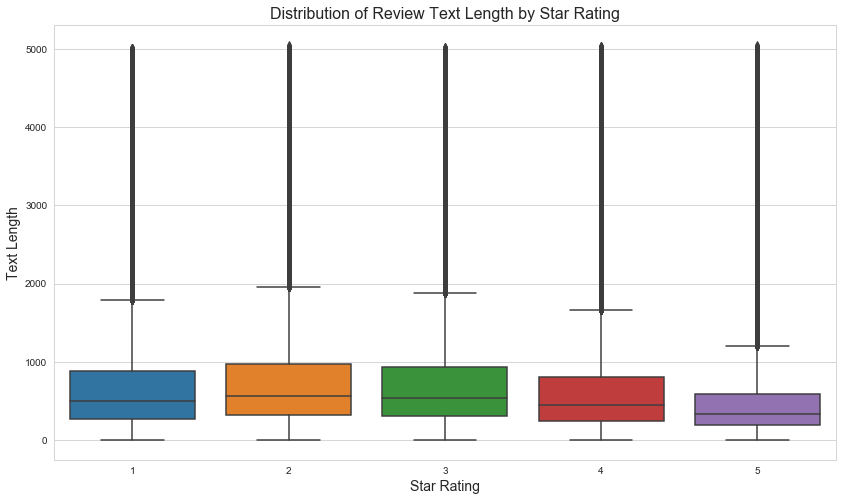

In [29]:
fig, ax = plt.subplots(figsize = (14,8))

sns.boxplot(x='rev_stars', y='text length', data=df)
plt.title('Distribution of Review Text Length by Star Rating', fontsize=16)
plt.ylabel('Text Length', fontsize=14)
plt.xlabel('Star Rating', fontsize=14)
#fig.savefig('Average_Star_Dist1.png')

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


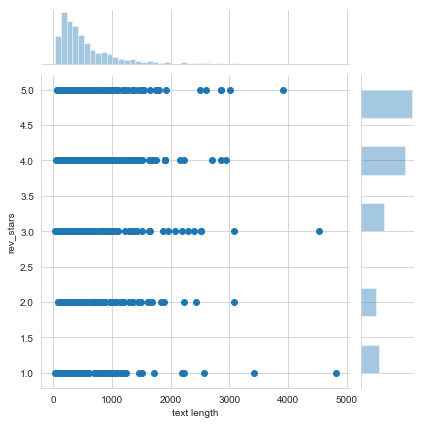

In [30]:
sns.jointplot(df['text length'][:1000], df['rev_stars'][:1000])
plt.show()

## Cities in the Dataset

Text(0.5, 0, 'Number of Reviews')

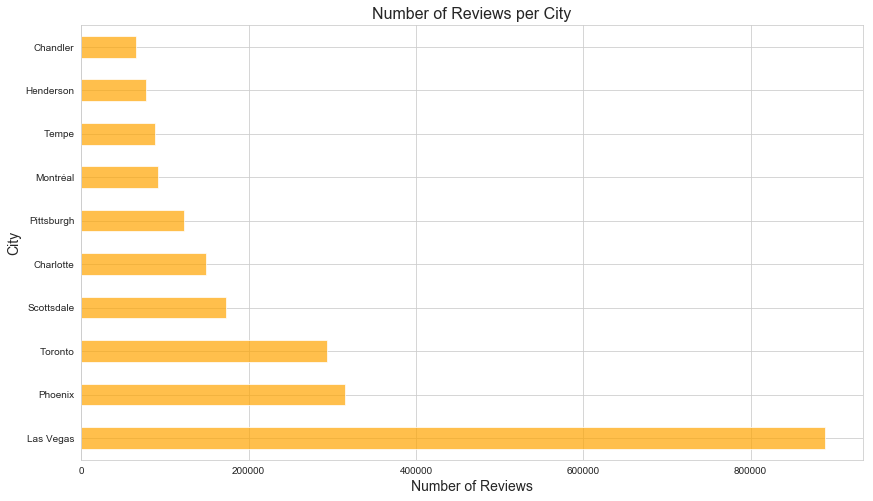

In [31]:
#which city has the most reviews?
fig, ax = plt.subplots(figsize = (14,8))

df.groupby(['city']).size().sort_values(ascending=False)[0:10].plot(kind='barh', color='orange', alpha=0.7)
plt.title('Number of Reviews per City', fontsize=16)
plt.ylabel('City', fontsize=14)
plt.xlabel('Number of Reviews', fontsize=14)
#fig.savefig('Review_per_city.png')

In [32]:
city_list = list(df.groupby(['city']).size().sort_values(ascending=False).keys()[0:10])

In [33]:
df_citycheck = df[df.city == 'Las Vegas']

In [34]:
df_citycheck.head()

,user_id,business_id,rev_stars,date,text,useful,funny,cool,name,neighborhood,address,city,state,postal_code,latitude,longitude,bus_stars,review_count,is_open,categories,weekday,text length,year
172626,zZtC3Sx0wUCT0ilBKnkyHg,rZwq4LBO0p9m9zJ2zSEKNQ,5,2011-12-08,Went there last week for the first time to cel...,0,1,0,"""Elements Fine Casual Dining & Cocktails""",Spring Valley,"""4950 S Rainbow Blvd, Ste 100""",Las Vegas,NV,89118,36.098705,-115.242484,4.0,201,0,Asian Fusion;Seafood;Italian;Food;American (Ne...,3,596,2011
172627,2EGgyze89f4ire3kYzJXbw,UPIYuRaZvknINOd1w8kqRQ,4,2016-11-28,"Worth the wait, ramen and pork belly were exce...",0,0,0,"""Monta Ramen""",Chinatown,"""5030 Spring Mountain Rd, Ste 6""",Las Vegas,NV,89146,36.127034,-115.209682,4.0,2291,1,Restaurants;Noodles;Ramen;Japanese,0,86,2016
172628,oXmoml3HFOyNxaTtX9MvLw,lmxA0dJM0XsPCIHPXhEQ-g,5,2017-01-23,The entertainer that was there last night was ...,6,1,4,"""Sake Rok""",The Strip,"""3786 Las Vegas Blvd S""",Las Vegas,NV,89109,36.103532,-115.174914,4.0,522,1,Asian Fusion;Sushi Bars;Japanese;Restaurants;N...,0,1059,2017
172629,e6fU2rOLDXSzTpbhwhRQkg,Cni2l-VKG_pdospJ6xliXQ,3,2013-01-12,I was expecting something amazing as I am a hu...,0,0,0,"""Burger Bar""",The Strip,"""3950 S Las Vegas Blvd""",Las Vegas,NV,89109,36.094460,-115.176113,4.0,2440,1,Bars;American (Traditional);Burgers;American (...,5,368,2013
172630,HxeiKWNQhp1QD7oImwzIxw,zdE82PiD6wquvjYLyhOJNA,5,2013-09-11,"WOW. Amazing! We got takeout, bulgogi entree a...",0,0,0,"""KoMex Fusion""",NaN,"""633 N Decatur Blvd, Ste H""",Las Vegas,NV,89107,36.179939,-115.206417,4.5,1171,1,Mexican;Korean;Restaurants;Asian Fusion,2,242,2013


### Calculating the Sparsity Matrix for each city

In [35]:
cities = {}
for i in range(0,len(city_list)):
    dfcity = df[df.city == city_list[i]]
    sparsity = (len(dfcity.user_id.unique()) /\
     (len(dfcity.business_id.unique())*len(df_citycheck.user_id.unique())))*100
    cities.update({city_list[i]:round(sparsity, 3)})

In [36]:
import operator
sorted_cities = sorted(cities.items(), key=operator.itemgetter(1), reverse=True)

In [37]:
sorted_cities

[('Las Vegas', 0.02),
 ('Scottsdale', 0.017),
 ('Henderson', 0.017),
 ('Tempe', 0.016),
 ('Chandler', 0.013),
 ('Phoenix', 0.012),
 ('Charlotte', 0.007),
 ('Pittsburgh', 0.006),
 ('Toronto', 0.003),
 ('Montréal', 0.003)]

## Looking at Restaurant Categories

In [38]:
categories = pd.DataFrame(df.groupby(['business_id','categories','bus_stars']).size())

In [39]:
categories = categories.reset_index()

In [40]:
categories.head(10)

,business_id,categories,bus_stars,0
0,--6MefnULPED_I942VcFNA,Chinese;Restaurants,3.0,37
1,--9e1ONYQuAa-CB_Rrw7Tw,Cajun/Creole;Steakhouses;Restaurants,4.0,1451
2,--DaPTJW3-tB1vP-PfdTEg,Restaurants;Breakfast & Brunch,3.5,39
3,--FBCX-N37CMYDfs790Bnw,Food;American (New);Nightlife;Bars;Beer;Wine &...,3.5,108
4,--GM_ORV2cYS-h38DSaCLw,Pizza;Chicken Wings;Salad;Restaurants,4.0,7
5,--I7YYLada0tSLkORTHb5Q,Restaurants;Sports Bars;American (Traditional)...,3.5,72
6,--KCl2FvVQpvjzmZSPyviA,Restaurants;Sandwiches;Pizza,3.0,12
7,--S62v0QgkqQaVUhFnNHrw,Breakfast & Brunch;American (Traditional);Rest...,2.0,28
8,--SrzpvFLwP_YFwB_Cetow,Restaurants;Chinese,3.5,44
9,--U98MNlDym2cLn36BBPgQ,Pizza;Restaurants,3.0,4


In [41]:
cat_split = categories['categories'].str.split(';', expand=True)

In [42]:
#remove irrelevant categories: Restaurant, Nightlife, Food
cat_split = cat_split.replace(to_replace=['Restaurants','Nightlife','Food'], value=np.nan)

Text(0.5, 0, 'Number of Occurances')

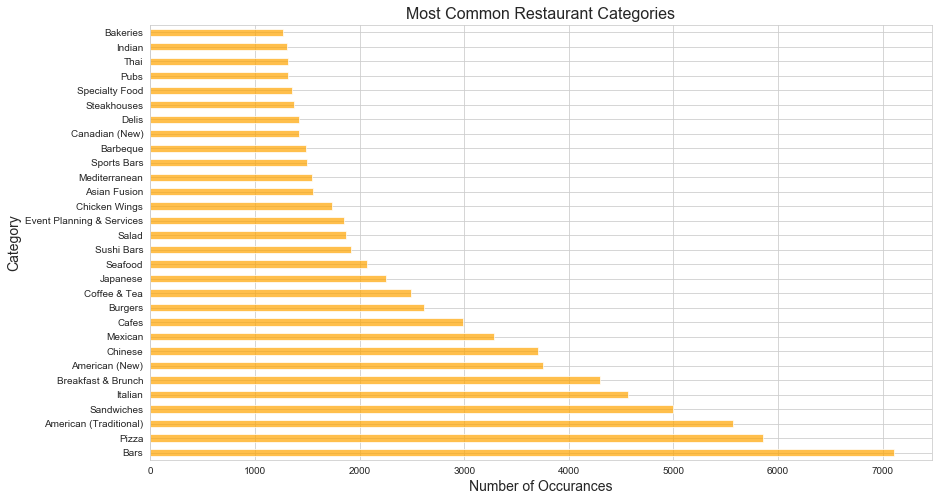

In [43]:
fig, ax = plt.subplots(figsize = (14,8))

cat_split.stack().value_counts(ascending=False)[0:30].plot(kind='barh', color='orange', alpha=0.7)
plt.title('Most Common Restaurant Categories', fontsize=16)
plt.ylabel('Category', fontsize=14)
plt.xlabel('Number of Occurances', fontsize=14)

#fig.savefig('Major_categories.png')

In [44]:
#Let's see what the average rating is for a few categories: Pizza, Japanese, Mediterranean, Chinese, Mexican
indian = df[df['categories'].str.contains('Indian')]
japanese = df[df['categories'].str.contains('Japanese')]
med = df[df['categories'].str.contains('Mediterranean')]
chinese = df[df['categories'].str.contains('Chinese')]
mexican = df[df['categories'].str.contains('Mexican')]

## Individual Restaurant Analysis

In [45]:
df.groupby(['business_id','name','city','rev_stars']).size().sort_values(ascending=False).head(10)

business_id             name                        city       rev_stars
4JNXUYY8wbaaDmk3BPzlWw  "Mon Ami Gabi"              Las Vegas  5            3280
RESDUcs7fIiihp38-d6_6g  "Bacchanal Buffet"          Las Vegas  5            2725
4JNXUYY8wbaaDmk3BPzlWw  "Mon Ami Gabi"              Las Vegas  4            2576
DkYS3arLOhA8si5uUEmHOw  "Earl of Sandwich"          Las Vegas  5            2443
hihud--QRriCYZw1zZvW4g  "Gangnam Asian BBQ Dining"  Las Vegas  5            2280
cYwJA2A6I12KNkm2rtXd5g  "Gordon Ramsay BurGR"       Las Vegas  5            2198
KskYqH1Bi7Z_61pH6Om8pg  "Lotus of Siam"             Las Vegas  5            2162
K7lWdNUhCbcnEvI0NhGewg  "Wicked Spoon"              Las Vegas  4            1913
RESDUcs7fIiihp38-d6_6g  "Bacchanal Buffet"          Las Vegas  4            1899
f4x1YBxkLrZg652xt2KR5g  "Hash House A Go Go"        Las Vegas  5            1888
dtype: int64

In [46]:
df.groupby(['user_id'])['useful'].sum().sort_values(ascending=False)[0:10]

user_id
bLbSNkLggFnqwNNzzq-Ijw    15557
zFYs8gSUYDvXkb6O7YkRkw    11515
8DEyKVyplnOcSKx39vatbg    11098
Fv0e9RIV9jw5TX3ctA1WbA     9934
DK57YibC5ShBmqQl97CKog     7424
PKEzKWv_FktMm2mGPjwd0Q     7322
CxDOIDnH8gp9KXzpBHJYXw     6872
M9rRM6Eo5YbKLKMG5QiIPA     6837
rCWrxuRC8_pfagpchtHp6A     6375
qewG3X2O4X6JKskxyyqFwQ     6277
Name: useful, dtype: int64

In [47]:
gordon = df[(df.business_id == "cYwJA2A6I12KNkm2rtXd5g") & (df.rev_stars == 5)]

In [48]:
gordon_all = df[(df.business_id == "cYwJA2A6I12KNkm2rtXd5g")]

In [49]:
gordon_all = gordon_all[['date','user_id','rev_stars','useful','funny','cool','text length']]

In [50]:
gordon_all.head()

,date,user_id,rev_stars,useful,funny,cool,text length
172674,2013-08-18,0YBJMg4H0SGqYZbZTxnSOg,4,0,0,0,958
172822,2015-10-23,D9FTLv0yW469_OrVMH4t-Q,5,0,0,1,86
172854,2014-02-17,ltf9Hx604T5OjJ2jJ44BBg,1,1,0,0,383
172897,2016-05-11,FsUSrlL2-W3XsxmOctc9YA,3,1,1,2,471
172961,2017-01-02,Ws70fVeBQnHOFJ-xzJoMnQ,1,0,2,0,411


In [51]:
gordon_all = gordon_all.sort_index()

([], <a list of 0 Text xticklabel objects>)

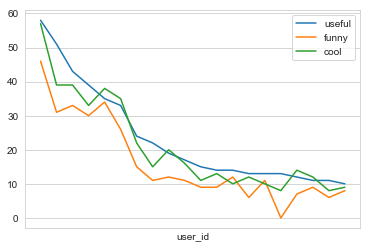

In [52]:
gordon.groupby('user_id')['useful','funny','cool'].sum().sort_values(by='useful', ascending=False)[0:20].plot()
plt.xticks([])

In [53]:
#let's sort by useful reviews with a lot of words
gordon.sort_values(by=['useful','text length'], ascending=False)

,user_id,business_id,rev_stars,date,text,useful,funny,cool,name,neighborhood,address,city,state,postal_code,latitude,longitude,bus_stars,review_count,is_open,categories,weekday,text length,year
834408,m9lvZzJBlfFMQz97CyWfuw,cYwJA2A6I12KNkm2rtXd5g,5,2016-03-02,I have to choose the right place for hamburger...,58,46,57,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,2,407,2016
2996564,Gppf1W0Bk9olxs1vplhmUg,cYwJA2A6I12KNkm2rtXd5g,5,2014-11-02,Being an avid burger lover who is always in se...,51,31,39,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,6,2099,2014
228137,393M4uM_4GBLPbhQIQtF9g,cYwJA2A6I12KNkm2rtXd5g,5,2016-02-29,Gordon Ramsay didn't let me down. I had this ...,43,33,39,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,0,1518,2016
1772075,Wd4FRRD30avk-Mj6C_O2ow,cYwJA2A6I12KNkm2rtXd5g,5,2014-01-14,2014 YELP 100 CHALLENGE - 39\/100\n\nMy boyfri...,39,30,33,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,1,3491,2014
1127244,WGBpuJBQ1FqRTxM8J5BBHg,cYwJA2A6I12KNkm2rtXd5g,5,2015-04-21,LOVED IT!!!\n\nMisc Items: No reservations ar...,35,34,38,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,1,2810,2015
1455227,cnN6RMKuQiUte7ekcYnK5g,cYwJA2A6I12KNkm2rtXd5g,5,2016-06-21,"When I find myself in times of trouble, Gordon...",33,26,35,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,1,2802,2016
259869,Nci8Nx0_9G0MSLYvQifacQ,cYwJA2A6I12KNkm2rtXd5g,5,2015-06-28,If I could meet the great Gordon Ramsay in per...,24,15,22,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,6,2689,2015
552735,CY9iLsE2z_yLhLqJdD1WGw,cYwJA2A6I12KNkm2rtXd5g,5,2013-04-12,GO BURGER OFF!!!\n\nThat seems like something ...,22,11,15,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,4,4701,2013
1731549,ZIOCmdFaMIF56FR-nWr_2A,cYwJA2A6I12KNkm2rtXd5g,5,2014-02-07,"It's loud, sporty, with a whole lot of real fl...",19,12,20,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,4,1932,2014
2990398,wwmJ56OlvMC_Z8llXTd6mA,cYwJA2A6I12KNkm2rtXd5g,5,2014-09-16,British Chefs - 1. American Chefs - 0.\n\nWay ...,17,11,16,"""Gordon Ramsay BurGR""",The Strip,"""3667 Las Vegas Blvd S""",Las Vegas,NV,89109,36.110724,-115.172169,4.0,5447,0,American (Traditional);Burgers;Restaurants,1,2817,2014


In [54]:
#taking a look at a useful review with a lot of words
gordon.loc[2996564]

user_id                                    Gppf1W0Bk9olxs1vplhmUg
business_id                                cYwJA2A6I12KNkm2rtXd5g
rev_stars                                                       5
date                                          2014-11-02 00:00:00
text            Being an avid burger lover who is always in se...
useful                                                         51
funny                                                          31
cool                                                           39
name                                        "Gordon Ramsay BurGR"
neighborhood                                            The Strip
address                                   "3667 Las Vegas Blvd S"
city                                                    Las Vegas
state                                                          NV
postal_code                                                 89109
latitude                                                  36.1107
longitude 

### Looking at Checkins

In [55]:
df_check = pd.read_csv(f'{path}/external/yelp_checkin.csv')

In [56]:
df_check.head()

,business_id,weekday,hour,checkins
0,3Mc-LxcqeguOXOVT_2ZtCg,Tue,0:00,12
1,SVFx6_epO22bZTZnKwlX7g,Wed,0:00,4
2,vW9aLivd4-IorAfStzsHww,Tue,14:00,1
3,tEzxhauTQddACyqdJ0OPEQ,Fri,19:00,1
4,CEyZU32P-vtMhgqRCaXzMA,Tue,17:00,1


In [57]:
gordon_checkin = df_check[(df_check.business_id == "cYwJA2A6I12KNkm2rtXd5g")]

In [58]:
gordon_checkin['weekday'] = pd.Categorical(gordon_checkin['weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [59]:
gordon_checkin.head()

,business_id,weekday,hour,checkins
25162,cYwJA2A6I12KNkm2rtXd5g,Thu,3:00,131
63515,cYwJA2A6I12KNkm2rtXd5g,Mon,16:00,7
66894,cYwJA2A6I12KNkm2rtXd5g,Sat,18:00,173
115057,cYwJA2A6I12KNkm2rtXd5g,Wed,13:00,1
117984,cYwJA2A6I12KNkm2rtXd5g,Tue,4:00,116


In [60]:
checkin_by_day = gordon_checkin.groupby(['weekday','hour']).sum()

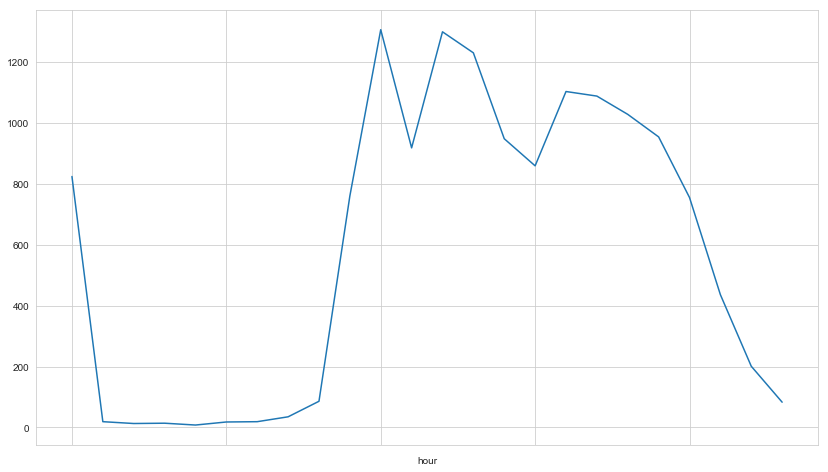

In [61]:
fig, ax = plt.subplots(figsize = (14,8))


gordon_checkin.groupby(['hour'])['checkins'].sum().plot()

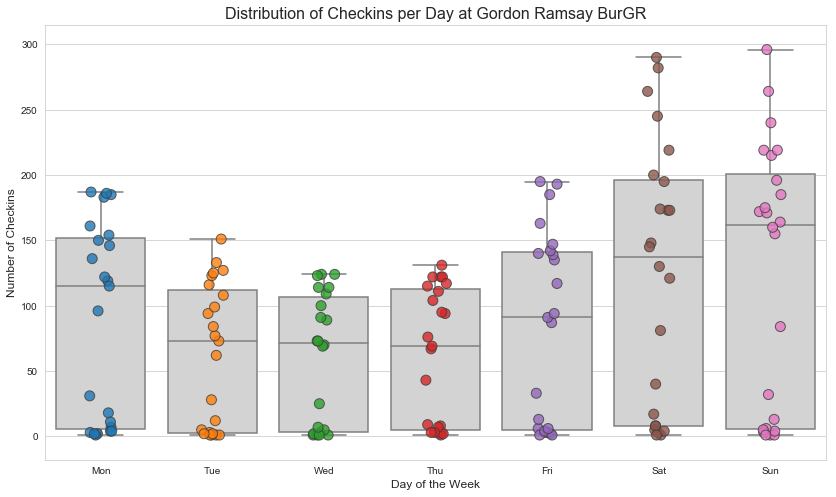

In [62]:
fig, ax = plt.subplots(figsize = (14,8))



sns.boxplot(x='weekday', y='checkins', data=gordon_checkin, color='lightgray')
sns.stripplot(x='weekday', y='checkins', data=gordon_checkin, alpha=0.8, jitter=True, size=10, linewidth=1)
plt.title('Distribution of Checkins per Day at Gordon Ramsay BurGR', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Checkins', fontsize=12)

fig.savefig('Gordon_Ramsay_Checkin.png')

In [63]:
vegas = list(df[(df.city == "Las Vegas") & (df.neighborhood == 'The Strip') & (df.rev_stars == 5)].business_id)

In [64]:
vegas_checkins = df_check[df_check.business_id.isin(vegas)]

In [65]:
vegas_checkins['weekday'] = pd.Categorical(vegas_checkins['weekday'], categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], ordered=True)

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(-10, 60)

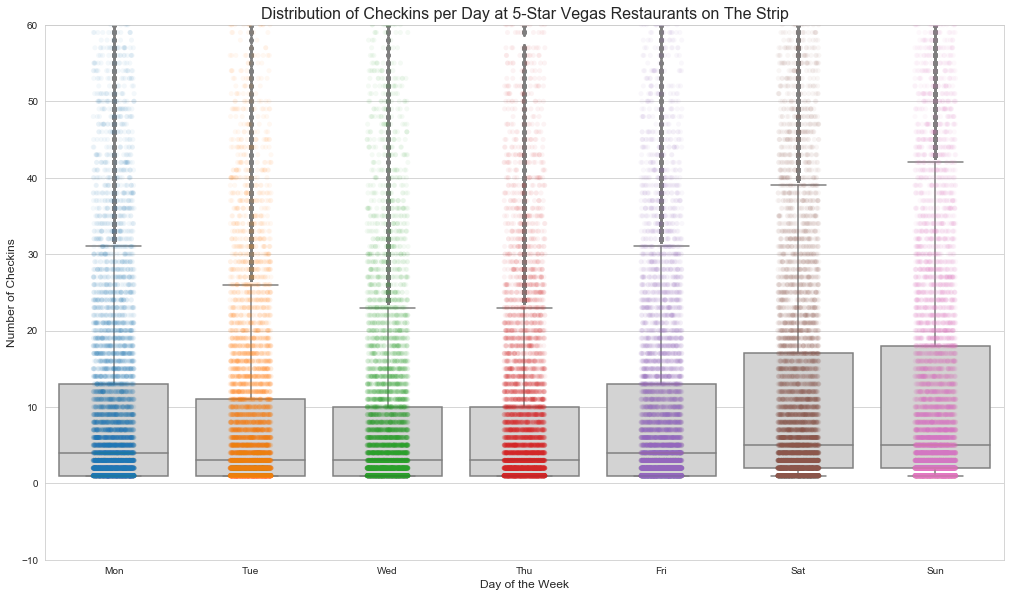

In [66]:
#how do all other restaurants on The Strip in Las Vegas compare?
fig, ax = plt.subplots(figsize = (14,8))
plt.tight_layout()

sns.boxplot(x='weekday', y='checkins', data=vegas_checkins, color='lightgray')
sns.stripplot(x='weekday', y='checkins', data=vegas_checkins, alpha=0.05, jitter=.15, size=5)
plt.title('Distribution of Checkins per Day at 5-Star Vegas Restaurants on The Strip', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Checkins', fontsize=12)
plt.ylim(-10, 60)

#fig.savefig('Vegas_Strip_Checkin.png')

### Timeseries

In [67]:
gordon_all['year'] = gordon_all.date.apply(lambda x: x.year)

In [68]:
gordon_all.head()

,date,user_id,rev_stars,useful,funny,cool,text length,year
172674,2013-08-18,0YBJMg4H0SGqYZbZTxnSOg,4,0,0,0,958,2013
172822,2015-10-23,D9FTLv0yW469_OrVMH4t-Q,5,0,0,1,86,2015
172854,2014-02-17,ltf9Hx604T5OjJ2jJ44BBg,1,1,0,0,383,2014
172897,2016-05-11,FsUSrlL2-W3XsxmOctc9YA,3,1,1,2,471,2016
172961,2017-01-02,Ws70fVeBQnHOFJ-xzJoMnQ,1,0,2,0,411,2017


In [69]:
gordon_all['week'] = gordon_all.date.apply(lambda x: x.week)

In [70]:
gordon_all.head()

,date,user_id,rev_stars,useful,funny,cool,text length,year,week
172674,2013-08-18,0YBJMg4H0SGqYZbZTxnSOg,4,0,0,0,958,2013,33
172822,2015-10-23,D9FTLv0yW469_OrVMH4t-Q,5,0,0,1,86,2015,43
172854,2014-02-17,ltf9Hx604T5OjJ2jJ44BBg,1,1,0,0,383,2014,8
172897,2016-05-11,FsUSrlL2-W3XsxmOctc9YA,3,1,1,2,471,2016,19
172961,2017-01-02,Ws70fVeBQnHOFJ-xzJoMnQ,1,0,2,0,411,2017,1


In [71]:
reviews = pd.DataFrame(gordon_all.groupby(['year', 'week', 'rev_stars']).size()).reset_index()

In [72]:
reviews.head(10)

,year,week,rev_stars,0
0,2012,1,1,4
1,2012,51,5,1
2,2012,52,1,1
3,2012,52,2,1
4,2012,52,4,4
5,2012,52,5,5
6,2013,1,1,1
7,2013,1,3,2
8,2013,1,4,7
9,2013,1,5,8


In [73]:
reviews_good = reviews[(reviews.rev_stars >= 4) & (reviews.year == 2015)]

In [74]:
reviews_good.head()

,year,week,rev_stars,0
469,2015,1,4,6
470,2015,1,5,8
474,2015,2,4,10
475,2015,2,5,10
479,2015,3,4,6


Text(0.5, 1.0, '2015 Distribution of 4 & 5 Star Ratings for Gordon Ramsay BurGR')

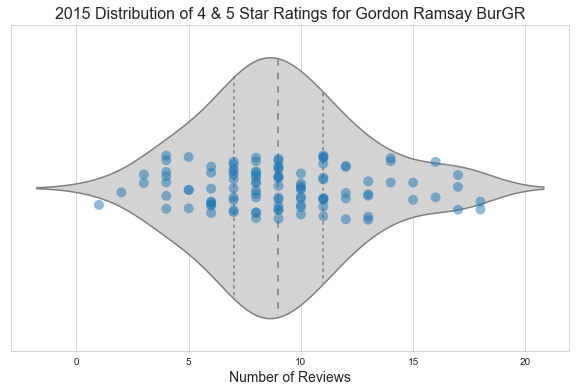

In [75]:
fig, ax = plt.subplots(figsize = (10,6))
sns.violinplot(reviews_good[0], color='lightgray', inner='quartile')
sns.stripplot(reviews_good[0], size=10, alpha=0.5)
plt.xlabel('Number of Reviews', fontsize=14)
plt.title('2015 Distribution of 4 & 5 Star Ratings for Gordon Ramsay BurGR', fontsize=16)
#fig.savefig('High_Rtng_dist_GRB.png')

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


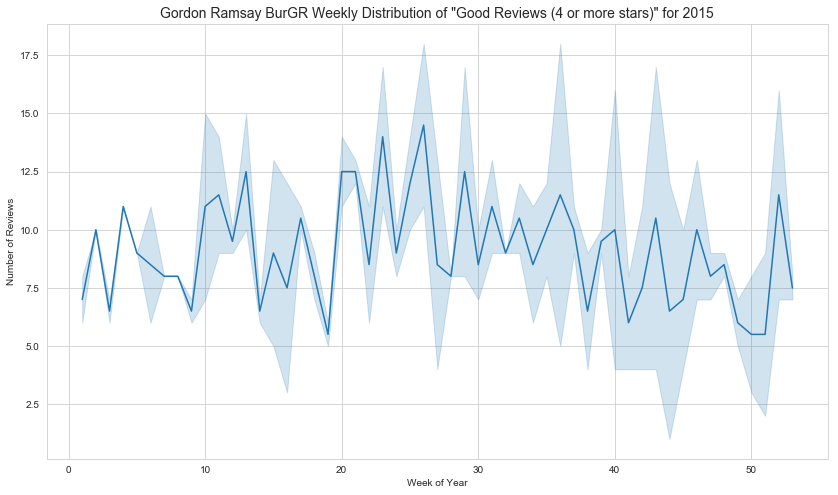

In [76]:
fig, ax = plt.subplots(figsize = (14,8))

sns.lineplot(x='week', y=0, data=reviews_good)

plt.title('Gordon Ramsay BurGR Weekly Distribution of "Good Reviews (4 or more stars)" for 2015', fontsize=14)
plt.ylabel('Number of Reviews')
plt.xlabel('Week of Year')
fig.savefig('Review_Pattern.png')

In [77]:
gordon_all['weekday'] = gordon_all.date.apply(lambda x: x.weekday())

(1, 5)

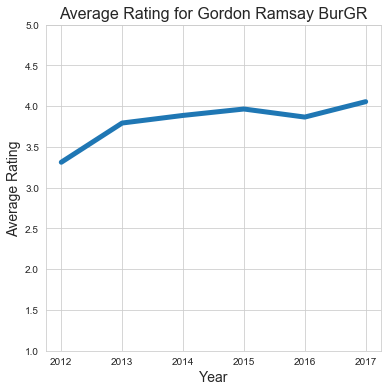

In [78]:
fig, ax = plt.subplots(figsize = (6,6))

gordon_all.groupby(['year'])['rev_stars'].mean().plot(linewidth=5)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.title('Average Rating for Gordon Ramsay BurGR',fontsize=16)
plt.ylim(1,5)

#fig.savefig('Ave_Rtng_GRB.png')

Text(0.5, 1.0, 'Distribution Star Ratings Over the Years for Gordon Ramsay BurGR')

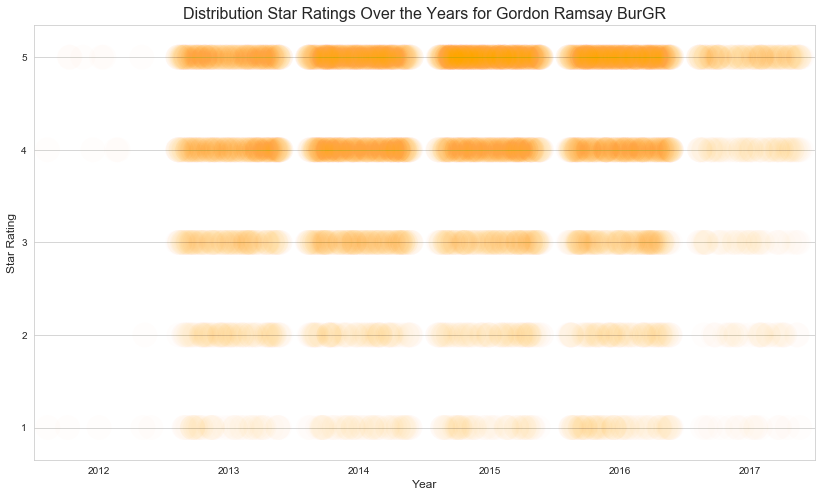

In [79]:
fig, ax = plt.subplots(figsize = (14,8))

sns.stripplot(x='year', y='rev_stars', data=gordon_all, alpha=0.01, 
              jitter=0.4, size=25, color='orange')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Star Rating', fontsize=12)

plt.title('Distribution Star Ratings Over the Years for Gordon Ramsay BurGR', fontsize=16)
#fig.savefig('Star_Distribution_Gordon.png')

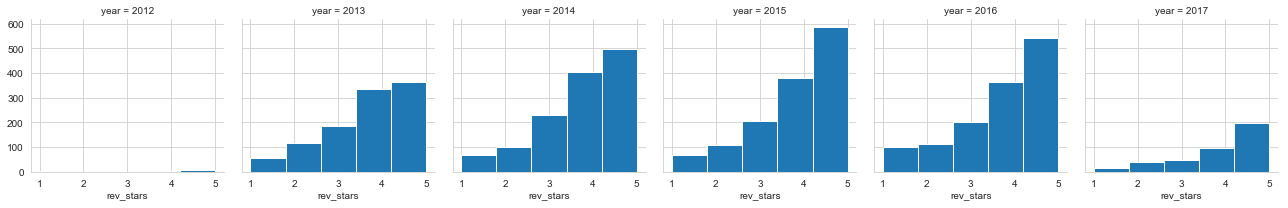

In [80]:
g = sns.FacetGrid(data=gordon_all, col='year')
g.map(plt.hist, 'rev_stars', bins=5)

## Users and their friends

In [81]:
df_friends = pd.read_csv(f'{path}/external/yelp_user.csv', parse_dates=['yelping_since'])

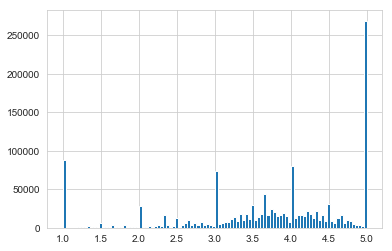

In [82]:
df_friends.average_stars.hist(bins=100)

In [83]:
df_friends.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,3.70,0,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,2.00,0,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,4.67,0,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,4.67,0,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,3.45,0,0,0,0,0,0,0,0,0,1,0


In [84]:
df_friends.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326100 entries, 0 to 1326099
Data columns (total 22 columns):
user_id               1326100 non-null object
name                  1325603 non-null object
review_count          1326100 non-null int64
yelping_since         1326100 non-null datetime64[ns]
friends               1326100 non-null object
useful                1326100 non-null int64
funny                 1326100 non-null int64
cool                  1326100 non-null int64
fans                  1326100 non-null int64
elite                 1326100 non-null object
average_stars         1326100 non-null float64
compliment_hot        1326100 non-null int64
compliment_more       1326100 non-null int64
compliment_profile    1326100 non-null int64
compliment_cute       1326100 non-null int64
compliment_list       1326100 non-null int64
compliment_note       1326100 non-null int64
compliment_plain      1326100 non-null int64
compliment_cool       1326100 non-null int64
compliment_funny 

In [85]:
df_friends['friends'] = df_friends.friends.apply(lambda x: np.nan if x == 'None' else x)

In [86]:
df_with_friends = df_friends.dropna()

In [87]:
df_with_friends.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,3.70,0,0,0,0,0,0,0,0,0,0,0
17,h5ERTYn2vQ1QbjTZvfWPaA,Bobby,3,2017-01-07,"jYiZnueCr7gVq9T34xoa7g, yFLXGdY6rpHt7hRiwEFMag...",0,0,0,0,None,3.33,0,0,0,0,0,0,0,0,0,0,0
18,jYnkJR3T8yCERXywoVhWYA,Hugo,48,2010-07-06,"hkXekeW_Jj6mIy8r8N7r1Q, dQDpV-VUtwYGqHznuRV-yw...",15,6,2,3,None,3.73,2,0,0,0,0,1,1,1,1,2,0
44,fV8Yr0c5tFQTQ2SRRJHXHw,Michelle,50,2007-08-22,"HDb4fBWIAQ-foS8qLJty9w, x0hBZsmBTYxhjjx0MShz1A...",43,12,5,1,2009,3.96,2,4,0,0,0,9,7,7,7,4,0
74,aw973Pm1nrTbRjP4zY9B9g,Kenny,762,2008-09-23,"Cit5yho-DqotA0BnXHErTQ, bm2DqfP4P454FjEtCbZdkQ...",174,151,67,27,"2014, 2016, 2013, 2015, 2010, 2012, 2011",3.60,20,4,2,7,0,16,52,47,47,14,1


In [88]:
df_with_friends['num_friends'] = df_with_friends.friends.apply(lambda x: x.count(',') + 1)

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [89]:
df_with_friends['year'] = df_with_friends.yelping_since.apply(lambda x: x.year)

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


##### A Dataframe containing only users with friends

In [90]:
df_with_friends.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,num_friends,year
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,3.70,0,0,0,0,0,0,0,0,0,0,0,79,2013
17,h5ERTYn2vQ1QbjTZvfWPaA,Bobby,3,2017-01-07,"jYiZnueCr7gVq9T34xoa7g, yFLXGdY6rpHt7hRiwEFMag...",0,0,0,0,None,3.33,0,0,0,0,0,0,0,0,0,0,0,64,2017
18,jYnkJR3T8yCERXywoVhWYA,Hugo,48,2010-07-06,"hkXekeW_Jj6mIy8r8N7r1Q, dQDpV-VUtwYGqHznuRV-yw...",15,6,2,3,None,3.73,2,0,0,0,0,1,1,1,1,2,0,263,2010
44,fV8Yr0c5tFQTQ2SRRJHXHw,Michelle,50,2007-08-22,"HDb4fBWIAQ-foS8qLJty9w, x0hBZsmBTYxhjjx0MShz1A...",43,12,5,1,2009,3.96,2,4,0,0,0,9,7,7,7,4,0,100,2007
74,aw973Pm1nrTbRjP4zY9B9g,Kenny,762,2008-09-23,"Cit5yho-DqotA0BnXHErTQ, bm2DqfP4P454FjEtCbZdkQ...",174,151,67,27,"2014, 2016, 2013, 2015, 2010, 2012, 2011",3.60,20,4,2,7,0,16,52,47,47,14,1,332,2008


In [91]:
df_with_friends.average_stars.mean()

3.7954295134167597

In [92]:
#remove users with less than 10 friends
df_with_friends.drop(df_with_friends[df_with_friends.review_count < 10].index, inplace=True)

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


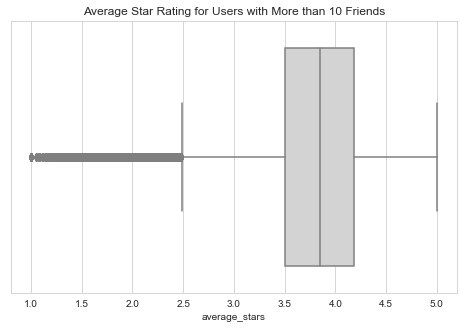

In [93]:
fig, ax = plt.subplots(figsize = (8,5))

sns.boxplot(x='average_stars', data=df_with_friends, color='lightgray')
plt.title('Average Star Rating for Users with More than 10 Friends')
fig.savefig('Reviews_With_Friends.png')

#fig.savefig('Users_with_friends.png')

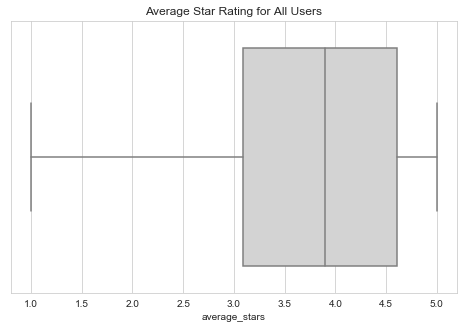

In [94]:
fig, ax = plt.subplots(figsize = (8,5))

sns.boxplot(x='average_stars', data=df_friends, color='lightgray')
plt.title('Average Star Rating for All Users')
fig.savefig('Reviews_all.png')

#fig.savefig('All_users.png')

Text(0.5, 0, 'Number of Friends')

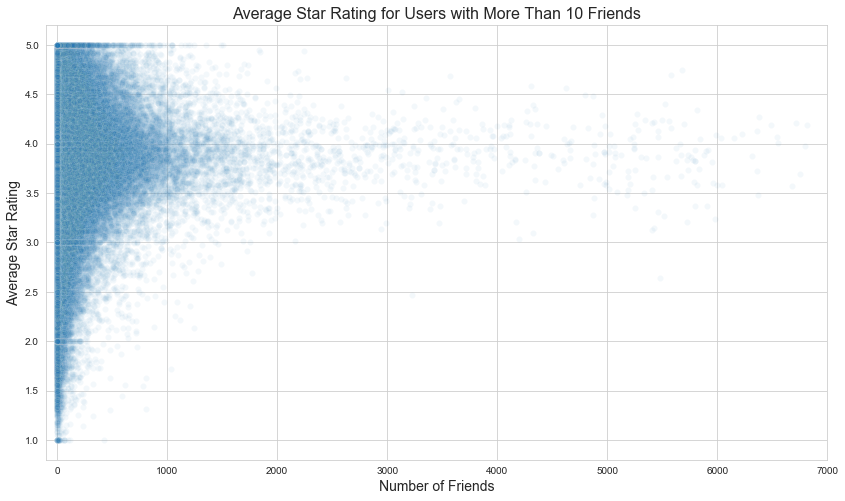

In [95]:
fig, ax = plt.subplots(figsize = (14,8))

sns.scatterplot(#x=np.log(df_friends.num_friends),
                x='num_friends', 
                y='average_stars', data=df_with_friends, alpha=0.05)
plt.xlim(-100,7000)
plt.title('Average Star Rating for Users with More Than 10 Friends', fontsize=16)
plt.ylabel('Average Star Rating', fontsize=14)
plt.xlabel('Number of Friends', fontsize=14)
#fig.savefig('Users_with_friends_scatter.png')

/Users/dmitriykats/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


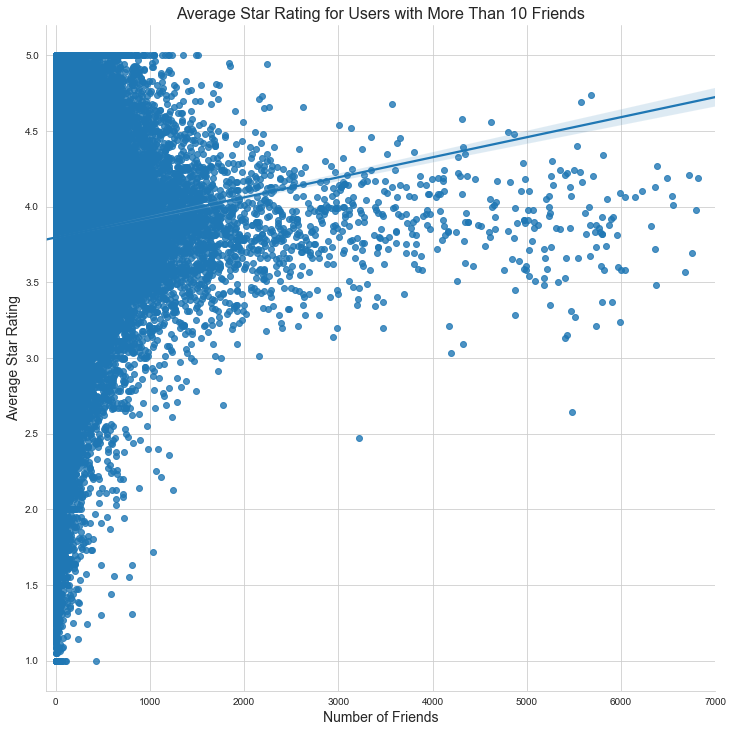

In [96]:
sns.lmplot(x='num_friends', y='average_stars', fit_reg=True, data=df_with_friends,
          height=10, aspect=1.0)
plt.xlim(-100,7000)
plt.ylim(0.8,5.2)
plt.title('Average Star Rating for Users with More Than 10 Friends', fontsize=16)
plt.ylabel('Average Star Rating', fontsize=14)
plt.xlabel('Number of Friends', fontsize=14)
plt.show()

Text(0.5, 0, 'Number of Reviews')

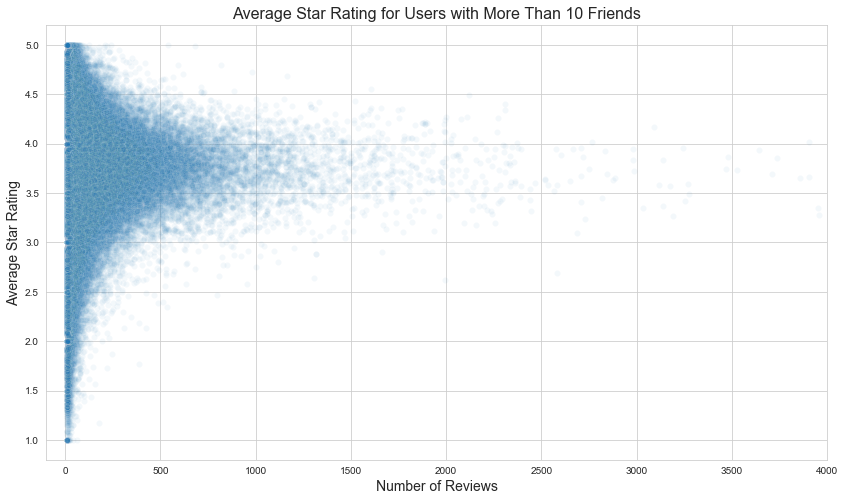

In [97]:
fig, ax = plt.subplots(figsize = (14,8))

sns.scatterplot(x='review_count', y='average_stars', data=df_with_friends, alpha=0.05)
plt.xlim(-100, 4000)
plt.title('Average Star Rating for Users with More Than 10 Friends', fontsize=16)
plt.ylabel('Average Star Rating', fontsize=14)
plt.xlabel('Number of Reviews', fontsize=14)

#fig.savefig('Average_review_scatter.png')

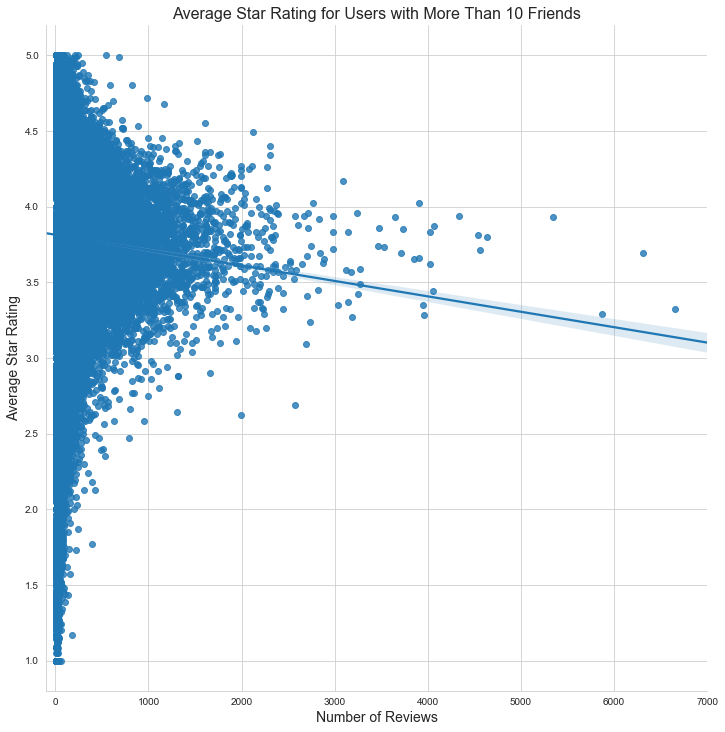

In [98]:
sns.lmplot(x='review_count', y='average_stars', fit_reg=True, data=df_with_friends,
          height=10, aspect=1.0)
plt.xlim(-100,7000)
plt.ylim(0.8,5.2)
plt.title('Average Star Rating for Users with More Than 10 Friends', fontsize=16)
plt.ylabel('Average Star Rating', fontsize=14)
plt.xlabel('Number of Reviews', fontsize=14)
plt.show()

Text(0.5, 52.0, 'Number of Friends (Log)')

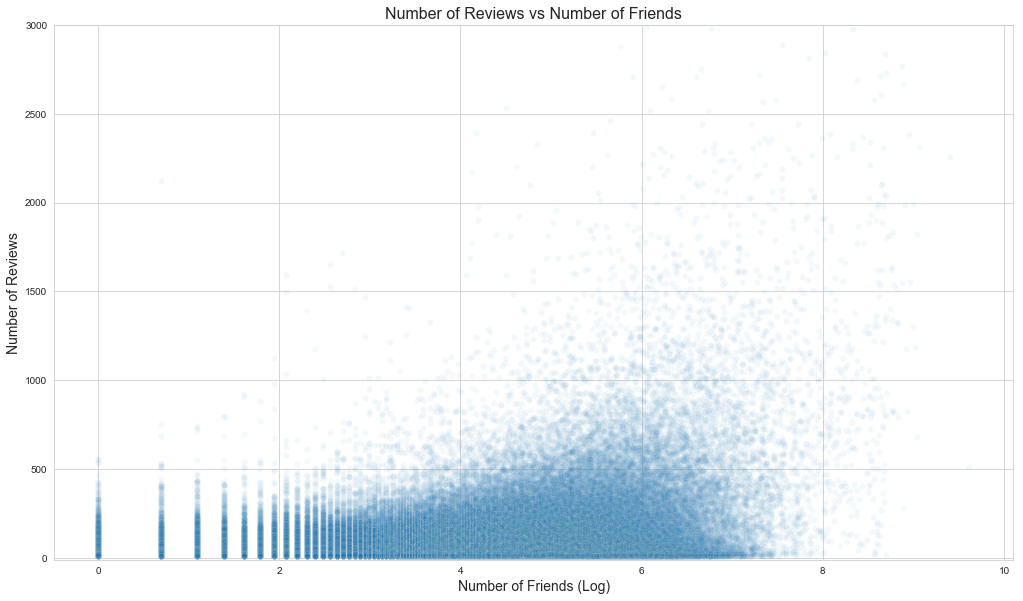

In [99]:
fig, ax = plt.subplots(figsize = (14,8))
plt.tight_layout()

sns.scatterplot(x=np.log(df_with_friends.num_friends), y='review_count', data=df_with_friends, alpha=0.05)
plt.ylim(-10,3000)
plt.title('Number of Reviews vs Number of Friends', fontsize=16)
plt.ylabel('Number of Reviews', fontsize=14)
plt.xlabel('Number of Friends (Log)', fontsize=14)

## Tips Dataset

Let's go back and take a look at our decision to use Scottsdale based on the matrix sparsity. 

In [100]:
sorted_cities

[('Las Vegas', 0.02),
 ('Scottsdale', 0.017),
 ('Henderson', 0.017),
 ('Tempe', 0.016),
 ('Chandler', 0.013),
 ('Phoenix', 0.012),
 ('Charlotte', 0.007),
 ('Pittsburgh', 0.006),
 ('Toronto', 0.003),
 ('Montréal', 0.003)]

In [101]:
#we've already pre-processed the data so we can import it
df_scott = pd.read_csv(f'{path}/interim/sdl_data.csv', parse_dates=['date'])
df_scott = df_scott.drop(columns='Unnamed: 0')

In [102]:
df_scott.head(2)

,user_id,business_id,rev_stars,date,text,useful,funny,cool,name,neighborhood,address,city,state,postal_code,latitude,longitude,bus_stars,review_count,is_open,categories,weekday,text length,year,split_categories,string_categories
0,771OWzbzelsEeSlx8QsfsQ,orMlHMLyHSldYgzfFTaeoA,4,2011-07-15,I really like this place. I have been numerous...,1,0,0,"""Eddie's House""",NaN,"""7042 E Indian School Rd""",Scottsdale,AZ,85251,33.495235,-111.929214,3.5,317,0,Seafood;American (New);Restaurants,4,509,2011,"['Seafood', 'American (New)']",Seafood American (New)
1,Pj9YpaP0T7A_5S_PT8IpNg,OtVNeY6IfUh3CIOCzmfg3A,5,2012-08-15,Greasewood Flat is hugely popular with winter ...,4,3,2,"""Greasewood Flat""",NaN,"""27375 N Alma School Pkwy""",Scottsdale,AZ,85255,33.731797,-111.846131,4.0,123,0,Burgers;Restaurants;Hot Dogs;Nightlife;Bars,2,1463,2012,"['Burgers', 'Hot Dogs', 'Bars']",Burgers Hot Dogs Bars


In [103]:
print('==========SCOTTSDALE=========')
print(f'Number of Users: {df_scott.user_id.unique().shape[0]}')
print(f'Number of Restaurants: {df_scott.business_id.unique().shape[0]}')
print(f'Number of Reviews: {df_scott.text.unique().shape[0]}')

==========SCOTTSDALE=========
Number of Users: 3119
Number of Restaurants: 1210
Number of Reviews: 24738


In [104]:
scott_users = list(df_scott.user_id.unique())
scott_biz = list(df_scott.business_id.unique())

In [105]:
df_tips = pd.read_csv(f'{path}/external/yelp_tip.csv', parse_dates=['date'])

In [106]:
df_tips.head()

,text,date,likes,business_id,user_id
0,Great breakfast large portions and friendly wa...,2015-08-12,0,jH19V2I9fIslnNhDzPmdkA,ZcLKXikTHYOnYt5VYRO5sg
1,Nice place. Great staff. A fixture in the tow...,2014-06-20,0,dAa0hB2yrnHzVmsCkN4YvQ,oaYhjqBbh18ZhU0bpyzSuw
2,Happy hour 5-7 Monday - Friday,2016-10-12,0,dAa0hB2yrnHzVmsCkN4YvQ,ulQ8Nyj7jCUR8M83SUMoRQ
3,"Parking is a premium, keep circling, you will ...",2017-01-28,0,ESzO3Av0b1_TzKOiqzbQYQ,ulQ8Nyj7jCUR8M83SUMoRQ
4,Homemade pasta is the best in the area,2017-02-25,0,k7WRPbDd7rztjHcGGkEjlw,ulQ8Nyj7jCUR8M83SUMoRQ


In [107]:
print('==========TIPS=========')
print(f'Number of Users: {df_tips.user_id.unique().shape[0]}')
print(f'Number of Restaurants: {df_tips.business_id.unique().shape[0]}')
print(f'Number of Reviews: {df_tips.text.unique().shape[0]}')

==========TIPS=========
Number of Users: 271679
Number of Restaurants: 112365
Number of Reviews: 1032860


In [108]:
#and now let's only keep the businesses that are in the scottsdale dataframe
df_tips_scott = df_tips[df_tips.business_id.isin(scott_biz)]

In [109]:
print('==========TIPS AFTER FILTERING BUSINESSES=========')
print(f'Number of Users: {df_tips_scott.user_id.unique().shape[0]}')
print(f'Number of Restaurants: {df_tips_scott.business_id.unique().shape[0]}')
print(f'Number of Reviews: {df_tips_scott.text.unique().shape[0]}')

==========TIPS AFTER FILTERING BUSINESSES=========
Number of Users: 16102
Number of Restaurants: 1112
Number of Reviews: 35750


Almost every restaurant in our Scottsdale dataset has a tip

In [110]:
df_tips_scott.head()

,text,date,likes,business_id,user_id
35,closed closed closed closed closed closed clos...,2012-03-28,0,Xmndl6GoZg8taEUlwQMYxg,TvkqJ8YEIsTb16RnnrNyfQ
49,"I didn't eat here, but they were nice enough t...",2012-03-28,0,HWjqW5ZFJ8eZRQuHcpySQA,TvkqJ8YEIsTb16RnnrNyfQ
1810,"I've been missing good sushi, it's time!",2010-12-30,0,QS3QxI7u5PRdtbGgI0-UsA,PAeEkjrXTub0ENa4rZiWvA
1811,Enjoying date night with Kate.,2012-02-22,0,QS3QxI7u5PRdtbGgI0-UsA,PAeEkjrXTub0ENa4rZiWvA
1812,"Great sushi lunch special - board, soup and sa...",2013-06-27,0,QS3QxI7u5PRdtbGgI0-UsA,PAeEkjrXTub0ENa4rZiWvA


In [111]:
df_tips_scott.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36847 entries, 35 to 1097995
Data columns (total 5 columns):
text           36847 non-null object
date           36847 non-null datetime64[ns]
likes          36847 non-null int64
business_id    36847 non-null object
user_id        36847 non-null object
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.7+ MB


In [112]:
df_tips_scott.groupby(['business_id','text']).size()[0:5]

business_id             text                                                                       
-01XupAWZEXbdNbxNg5mEg  Bartender nasty... No manners & bad service. :(   Too busy texting             1
                        Check sandwich for plastic bread ties before eating.  Yeah not happy camper    1
                        Come early to get a spot by the glass. Kids will love it.                      1
                        Come for HH!!                                                                  1
                        Coyotes!                                                                       1
dtype: int64

## Business Attributes Dataset

In [113]:
df_att = pd.read_csv(f'{path}/external/yelp_business_attributes.csv')

In [114]:
df_att.head()

,business_id,AcceptsInsurance,ByAppointmentOnly,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,HairSpecializesIn_coloring,HairSpecializesIn_africanamerican,HairSpecializesIn_curly,HairSpecializesIn_perms,HairSpecializesIn_kids,HairSpecializesIn_extensions,HairSpecializesIn_asian,HairSpecializesIn_straightperms,RestaurantsPriceRange2,GoodForKids,WheelchairAccessible,BikeParking,Alcohol,HasTV,NoiseLevel,RestaurantsAttire,...,BestNights_saturday,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_breakfast,GoodForMeal_brunch,CoatCheck,Smoking,DriveThru,DogsAllowed,BusinessAcceptsBitcoin,Open24Hours,BYOBCorkage,BYOB,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
0,FYWN1wneV18bWNgQjJ2GNg,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
1,He-G7vWjzVUysIKrfNbPUQ,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
2,8DShNS-LuFqpEWIp0HxijA,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
3,PfOCPjBrlQAnz__NXj9h_w,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
4,o9eMRCWt5PkpLDE0gOPtcQ,Na,Na,Na,Na,False,False,False,False,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,False,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na


In [115]:
df_att.columns

Index(['business_id', 'AcceptsInsurance', 'ByAppointmentOnly',
       'BusinessAcceptsCreditCards', 'BusinessParking_garage',
       'BusinessParking_street', 'BusinessParking_validated',
       'BusinessParking_lot', 'BusinessParking_valet',
       'HairSpecializesIn_coloring', 'HairSpecializesIn_africanamerican',
       'HairSpecializesIn_curly', 'HairSpecializesIn_perms',
       'HairSpecializesIn_kids', 'HairSpecializesIn_extensions',
       'HairSpecializesIn_asian', 'HairSpecializesIn_straightperms',
       'RestaurantsPriceRange2', 'GoodForKids', 'WheelchairAccessible',
       'BikeParking', 'Alcohol', 'HasTV', 'NoiseLevel', 'RestaurantsAttire',
       'Music_dj', 'Music_background_music', 'Music_no_music', 'Music_karaoke',
       'Music_live', 'Music_video', 'Music_jukebox', 'Ambience_romantic',
       'Ambience_intimate', 'Ambience_classy', 'Ambience_hipster',
       'Ambience_divey', 'Ambience_touristy', 'Ambience_trendy',
       'Ambience_upscale', 'Ambience_casual', 'Restau

In [116]:
rest_att = df_att[['business_id',
       'BusinessAcceptsCreditCards', 'BusinessParking_garage',
       'BusinessParking_street', 'BusinessParking_validated',
       'BusinessParking_lot', 'BusinessParking_valet',
       'RestaurantsPriceRange2', 'GoodForKids', 'WheelchairAccessible',
       'BikeParking', 'Alcohol', 'HasTV', 'NoiseLevel', 'RestaurantsAttire',
       'Music_dj', 'Music_background_music', 'Music_no_music', 'Music_karaoke',
       'Music_live', 'Music_video', 'Music_jukebox', 'Ambience_romantic',
       'Ambience_intimate', 'Ambience_classy', 'Ambience_hipster',
       'Ambience_divey', 'Ambience_touristy', 'Ambience_trendy',
       'Ambience_upscale', 'Ambience_casual', 'RestaurantsGoodForGroups',
       'Caters', 'WiFi', 'RestaurantsReservations', 'RestaurantsTakeOut',
       'HappyHour', 'GoodForDancing', 'RestaurantsTableService',
       'OutdoorSeating', 'RestaurantsDelivery', 'BestNights_monday',
       'BestNights_tuesday', 'BestNights_friday', 'BestNights_wednesday',
       'BestNights_thursday', 'BestNights_sunday', 'BestNights_saturday',
       'GoodForMeal_dessert', 'GoodForMeal_latenight', 'GoodForMeal_lunch',
       'GoodForMeal_dinner', 'GoodForMeal_breakfast', 'GoodForMeal_brunch',
       'CoatCheck', 'Smoking', 'DriveThru', 'DogsAllowed',
       'BusinessAcceptsBitcoin', 'Open24Hours', 'BYOBCorkage', 'BYOB',
       'Corkage', 'DietaryRestrictions_dairy-free',
       'DietaryRestrictions_gluten-free', 'DietaryRestrictions_vegan',
       'DietaryRestrictions_kosher', 'DietaryRestrictions_halal',
       'DietaryRestrictions_soy-free', 'DietaryRestrictions_vegetarian',
       'AgesAllowed', 'RestaurantsCounterService']]

In [117]:
#filter for Scottsdale restaurants
scott_att = rest_att[rest_att.business_id.isin(scott_biz)]

In [118]:
scott_att.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 92 to 152001
Columns: 72 entries, business_id to RestaurantsCounterService
dtypes: object(72)
memory usage: 687.2+ KB


In [119]:
scott_att.head()

,business_id,BusinessAcceptsCreditCards,BusinessParking_garage,BusinessParking_street,BusinessParking_validated,BusinessParking_lot,BusinessParking_valet,RestaurantsPriceRange2,GoodForKids,WheelchairAccessible,BikeParking,Alcohol,HasTV,NoiseLevel,RestaurantsAttire,Music_dj,Music_background_music,Music_no_music,Music_karaoke,Music_live,Music_video,Music_jukebox,Ambience_romantic,Ambience_intimate,Ambience_classy,...,BestNights_saturday,GoodForMeal_dessert,GoodForMeal_latenight,GoodForMeal_lunch,GoodForMeal_dinner,GoodForMeal_breakfast,GoodForMeal_brunch,CoatCheck,Smoking,DriveThru,DogsAllowed,BusinessAcceptsBitcoin,Open24Hours,BYOBCorkage,BYOB,Corkage,DietaryRestrictions_dairy-free,DietaryRestrictions_gluten-free,DietaryRestrictions_vegan,DietaryRestrictions_kosher,DietaryRestrictions_halal,DietaryRestrictions_soy-free,DietaryRestrictions_vegetarian,AgesAllowed,RestaurantsCounterService
92,VdlPZg2NAu8t8GkdbPLecg,Na,Na,False,False,False,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,False,False,False,True,False,False,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,True,True,False,True,True,True,Na
196,Qv0OEziLJwyAqcgtrTsA4w,Na,Na,False,False,False,True,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
359,tCJGEQVqjELLYv3fPNX5Rw,Na,Na,Na,Na,Na,Na,Na,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
365,rv9T1qGHbh9eXqFpKEPy_A,Na,Na,False,False,False,True,Na,Na,True,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
507,0LKcSabd5Gd5oz-qrHTzZg,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,full_bar,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,...,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na,Na
